# **This is the first model that will be part of a multi-modal DL model consisting of 3 models**

### This model will process images from the front of the car only (no map, not information about distances)

#### **1. importing necessary libraries**

In [238]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization, Activation, BatchNormalization
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from PIL import Image
import time

In [168]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
config.allow_soft_placement = True

##### 1.1. we import the data

In [169]:
# Load the data
df = pd.read_csv('../frameRecorder/data.csv')

df.head()

,image_id,q,z,s,d,no_key
0,1680379725282,0,0,0,0,1
1,1680379725320,0,0,0,0,1
2,1680379725358,0,0,0,0,1
3,1680379725393,0,0,0,0,1
4,1680379725431,0,1,0,0,0


In [196]:
counts = df.sum()
print(counts)
min_count = counts.min()
print(min_count)
df_filtered = df.groupby(['q', 'z', 's', 'd', 'no_key']).filter(lambda x: (x['q']==1).sum() <= min_count and (x['z']==1).sum() <= min_count and (x['s']==1).sum() <= min_count and (x['d']==1).sum() <= min_count and (x['no_key']==1).sum() <= min_count)
print(df_filtered.sum())
print(df_filtered.shape)
df_filtered.head()

image_id    42792578302646081
q                        1553
z                       14304
s                        1916
d                        1643
no_key                   8193
dtype: int64
1553
image_id    5367136240000574
q                       1553
z                       2024
s                        117
d                       1643
no_key                     0
dtype: int64
(3194, 6)


,image_id,q,z,s,d,no_key
20,1680379726026,1,1,0,0,0
21,1680379726061,1,1,0,0,0
32,1680379726497,0,1,0,1,0
135,1680379730335,1,1,0,0,0
136,1680379730371,1,1,0,0,0


In [171]:
X, y = df_filtered.iloc[:, 0], df_filtered.iloc[:, 1:]
print(X[0:10])
print(X.shape)
print(y.shape)

20     1680379726026
21     1680379726061
32     1680379726497
135    1680379730335
136    1680379730371
137    1680379730407
173    1680379731750
174    1680379731784
175    1680379731823
190    1680379732394
Name: image_id, dtype: int64
(3194,)
(3194, 5)


In [172]:
XX = []
for i in X:
    img = cv.imread('../frameRecorder/screenshots/' + str(i) + '.png')
    img = img / 255
    XX.append(img)

In [173]:
# split the data into training , validation and testing
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [174]:
X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

In [175]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)

(2044, 100, 200, 3)
(511, 100, 200, 3)
(639, 100, 200, 3)
(2044, 5)


#### 1.2. we create the model 

In [256]:
# create the model using keras
with tf.compat.v1.Session(config=config) as sess:
    model = Sequential([
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 200, 3)),
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),

        Conv2D(128, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(0.25),
        
        Flatten(),
        Dense(100, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='relu'),
        Dense(5, activation='softmax')
    ])

In [257]:
# compile the model
with tf.compat.v1.Session(config=config) as sess:
    # compile the model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # summarize the model
    model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_147 (Conv2D)         (None, 98, 198, 32)       896       
                                                                 
 conv2d_148 (Conv2D)         (None, 96, 196, 64)       18496     
                                                                 
 max_pooling2d_39 (MaxPoolin  (None, 48, 98, 64)       0         
 g2D)                                                            
                                                                 
 dropout_2 (Dropout)         (None, 48, 98, 64)        0         
                                                                 
 conv2d_149 (Conv2D)         (None, 46, 96, 128)       73856     
                                                                 
 max_pooling2d_40 (MaxPoolin  (None, 23, 48, 128)      0         
 g2D)                                                

Train on 2044 samples, validate on 511 samples
Epoch 1/40
2044/2044 [==============================] - ETA: 0s - loss: 0.6420 - accuracy: 0.6676
Epoch 1: val_accuracy improved from -inf to 0.66654, saving model to model_1_3_0.h5
2044/2044 [==============================] - 103s 50ms/sample - loss: 0.6420 - accuracy: 0.6676 - val_loss: 0.6280 - val_accuracy: 0.6665
Epoch 2/40
2044/2044 [==============================] - ETA: 0s - loss: 0.5806 - accuracy: 0.6868
Epoch 2: val_accuracy improved from 0.66654 to 0.71624, saving model to model_1_3_0.h5
2044/2044 [==============================] - 46s 23ms/sample - loss: 0.5806 - accuracy: 0.6868 - val_loss: 0.4944 - val_accuracy: 0.7162
Epoch 3/40
2044/2044 [==============================] - ETA: 0s - loss: 0.4569 - accuracy: 0.7271
Epoch 3: val_accuracy improved from 0.71624 to 0.73894, saving model to model_1_3_0.h5
2044/2044 [==============================] - 47s 23ms/sample - loss: 0.4569 - accuracy: 0.7271 - val_loss: 0.4046 - val_accura

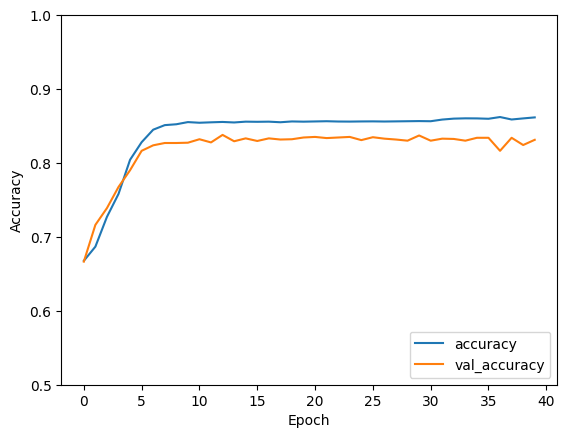

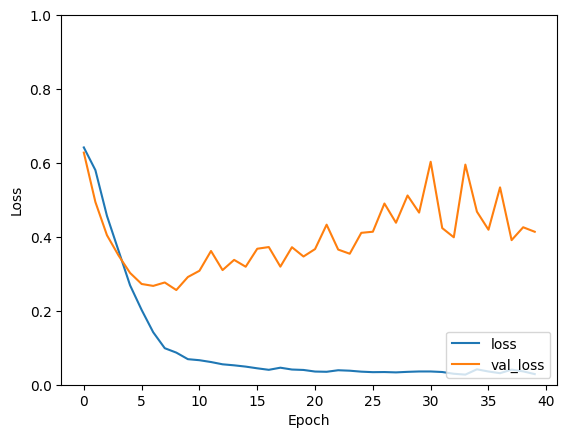

In [258]:
# train the model
with tf.compat.v1.Session(config=config) as sess:
    # define early stopping callback
    checkpoint = tf.keras.callbacks.ModelCheckpoint('model_1_3_0.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
    
    # fit the model
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=40, batch_size=64, callbacks=[checkpoint])

    # evaluate the model
    loss, acc = model.evaluate(X_test, y_test, verbose=2)
    print('Test Accuracy: {}'.format(acc))
    print('Test Loss: {}'.format(loss))

    # plot the accuracy
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.ylim([0.5, 1])
    plt.legend(loc='lower right')
    plt.show()

    # plot the loss
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.ylim([0, 1])
    plt.legend(loc='lower right')
    plt.show()

    # # save the model
    # model.save('model_1_3_0.h5')

In [259]:
# load model

model_test = tf.keras.models.load_model('model_1_3_0.h5')

1/1 [==============================] - 0s 21ms/step
[0.009999999776482582 0.9900000095367432 0.0 0.0 0.0 ]
Prediction time: 0.06276941299438477


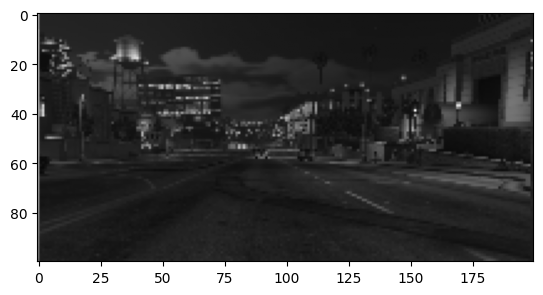

In [264]:
# predict the test data
t1 = time.time()
prediction = model_test.predict(np.array([XX[675]]))
t2 = time.time()
print('[', end='')
for(i, j) in enumerate(prediction[0]):
    print(f'{round(j, 2)}', end=' ')
print(']')
    
print(f'Prediction time: {t2 - t1}')

# plot the image and the prediction
plt.imshow(XX[675])
plt.show()

# qzsd